In [15]:
# Making necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Python Basics and Assignments/3. Machine Learning/Employee_Turnover/HR_comma_sep.csv")

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 1. Perform data quality checks by checking for missing values, if any.

In [18]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [19]:
# Converting all the column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [20]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
df.shape

(14999, 10)

In [22]:
print(df.sales.unique())
print("*"*70)
print(df.average_montly_hours.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
**********************************************************************
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 286 161 264 277 275 149 295
 151 249 291 232 130 129 155 265 279 284 221 154 150 267 257 177 144 289
 258 263 251 133 216 300 138 260 183 250 292 283 245 256 278 240 136 301
 243 296 274 164 146 261 285 141 297 156 287 219 254 228 131 252 236 270
 298 192 248 266 238 229 233 268 231 253 302 271 290 235 293 241 218 199
 180 195 237 227 172 206 181 217 310 214 198 211 222 213 202 184 204 288
 220 299 303 212 196 179 205 230 203 280 169 188 178 175 166 163 168 165
 189 162 215 193 176 191 174 201 208 171 111 104 106 100 194 209 185 200
 207 187 210 186 167 108 122 110 115 197 102 109 190  99 101  97 173 121
 170 105 118 119 117 11

In [23]:
# Changing column name of sales to department and correcting the average_montly_hour column spelling

df = df.rename(columns={'sales':'department', 'average_montly_hours':'average_monthly_hours'})
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [24]:
# There are no non-null values in the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [25]:
# There are 3008 duplicate records
df.duplicated().sum()

np.int64(3008)

In [26]:
df = df.drop_duplicates()

In [27]:
df.shape

(11991, 10)

In [28]:
# Changing RandD to r&d and converting all the values to lower case.
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [29]:
df['department'] = df.department.str.replace('RandD', 'r&d')
df['department'] = df.department.str.lower()

In [30]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'it', 'product_mng', 'marketing', 'r&d'], dtype=object)

In [31]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [32]:
# Checking for outliers for numeric columns
cols = df.select_dtypes(include=['number']).columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years']

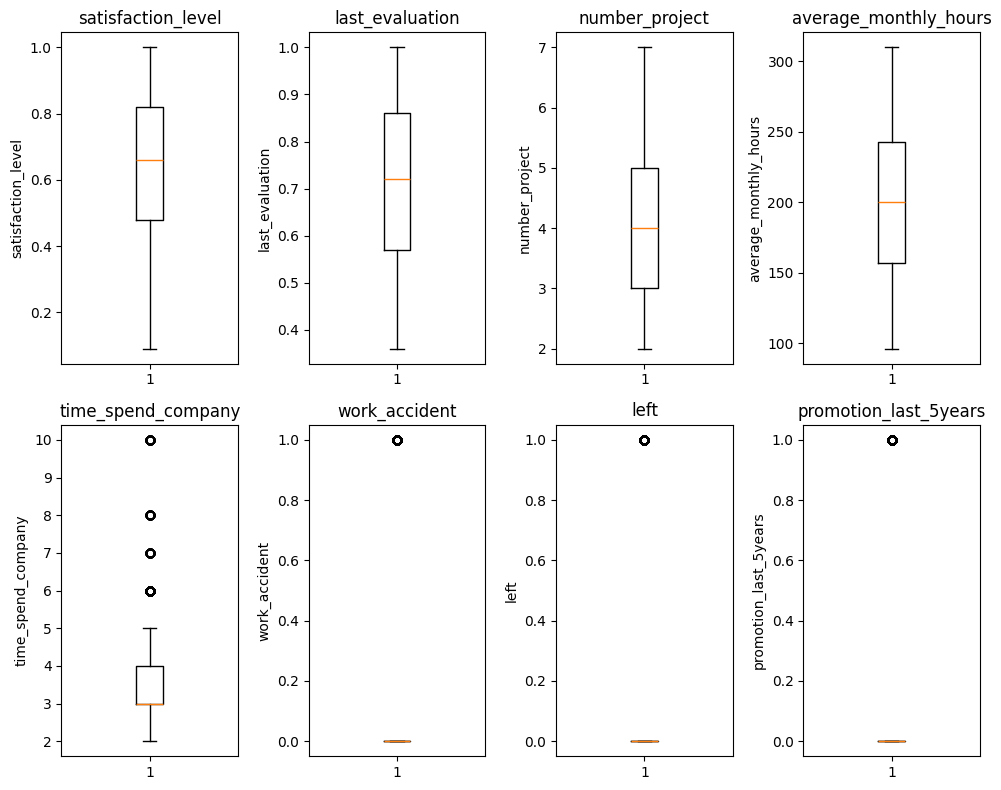

In [33]:
# plotting boxplot for all the cols collected above
fig, axes = plt.subplots(2, 4, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
  axes[i].boxplot(df[col])
  axes[i].set_title(col)
  axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

# boxplots below shows that there are no outliers and we don't need to handle the outlier records
# -- time_spend_company -- there are few employees who stayed in the organization for a long time. This can be a genuine case and needs no handling
# -- work_accident, left, promotion_last_5years are boolean values 0 and 1. So, we don't need any handling for these columns.


In [34]:
df.describe()

# The mean and 50 percentile are very close to each other for all the columns which shows that data is more or less normally distributed.
# work_accident, left and promotion_last_5years are boolean type columns with values as 0/1 only.

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Understand what factors contributed most to employee turnover at EDA.
# 2.1.Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

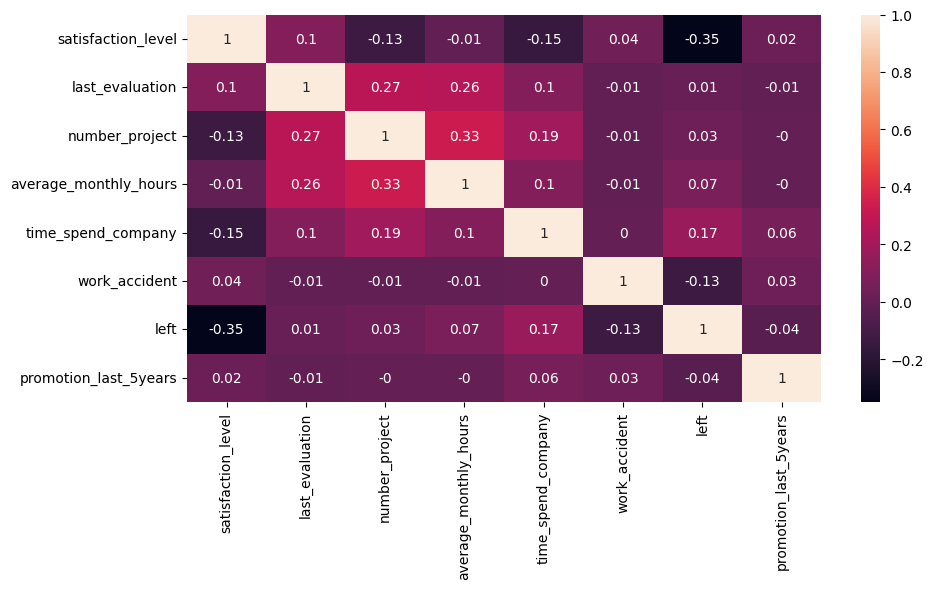

In [35]:
# plotting heatmap to understand the co-relation between the values
plt.figure(figsize=(10,6))
cols = df.select_dtypes(include=['number']).columns.tolist()
sns.heatmap(df[cols].corr().round(2), annot=True)
plt.tight_layout()
plt.show()

# There are no strong co-relation between the features.
# last_evaluation has +ve co-relation with number_project and average_monthly_hours
# number_project has +ve co-relation with average_monthly_hours
# satisfaction_level has -ve co-relation with left which shows employee leaving due to less satisfaction_level
# satisfaction_level also has -ve co-relation with number_project and time_spend_company. Shows that satisfaction_level reduces with increase in time_spend_company.

# 2.2.Draw the distribution plot of:
  # ■Employee Satisfaction (use column satisfaction_level)
  # ■Employee Evaluation (use column last_evaluation)
  # ■Employee Average Monthly Hours (use column average_montly_hours)


### 2.2.1 DistPlot for employee satisfaction

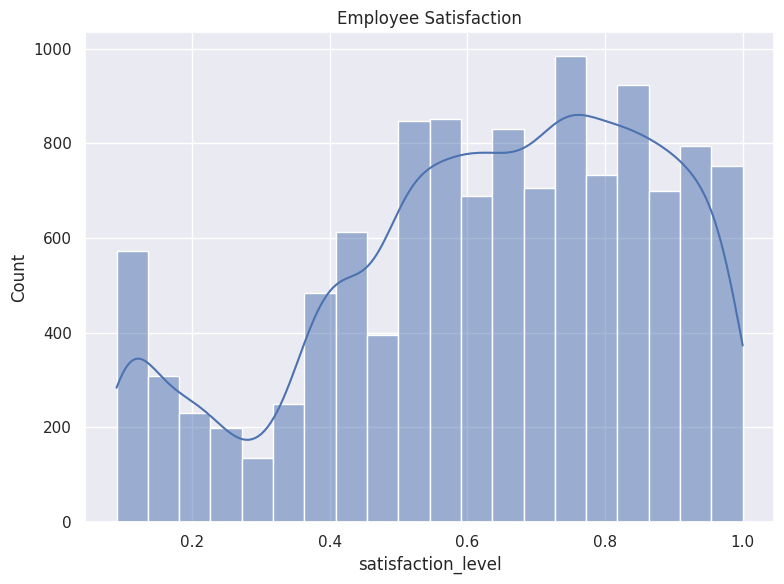

In [36]:
# using histplot as distplot is deprecated in seaborn

plt.figure(figsize=(8,6))
sns.set_theme()
sns.histplot(df['satisfaction_level'], bins=20, kde=True )
plt.title('Employee Satisfaction')
plt.tight_layout()
plt.show()

### 2.2.2 Employee Evaluation (use column last_evaluation)

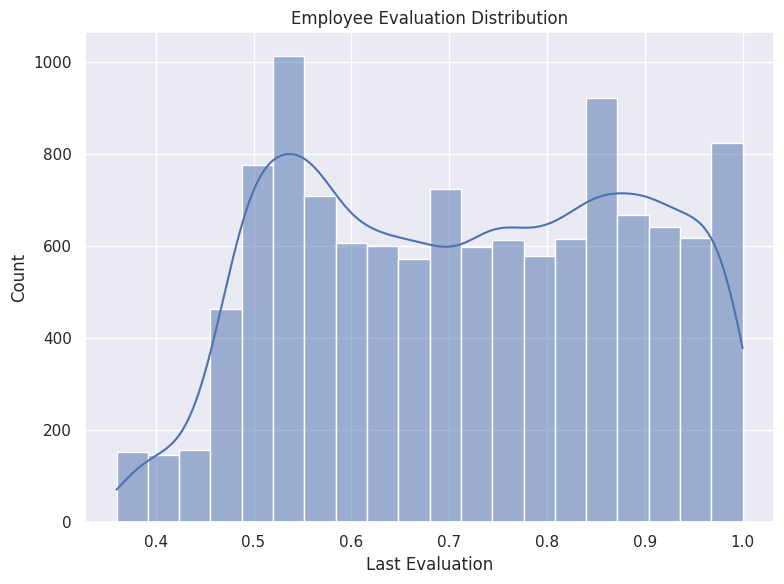

In [37]:
plt.figure(figsize=(8,6))
sns.set_theme()
sns.histplot(df['last_evaluation'], bins=20, kde=True)
plt.title('Employee Evaluation Distribution')
plt.xlabel('Last Evaluation')
plt.tight_layout()
plt.show()

### 2.2.3 Employee Average Monthly Hours (use column average_montly_hours)

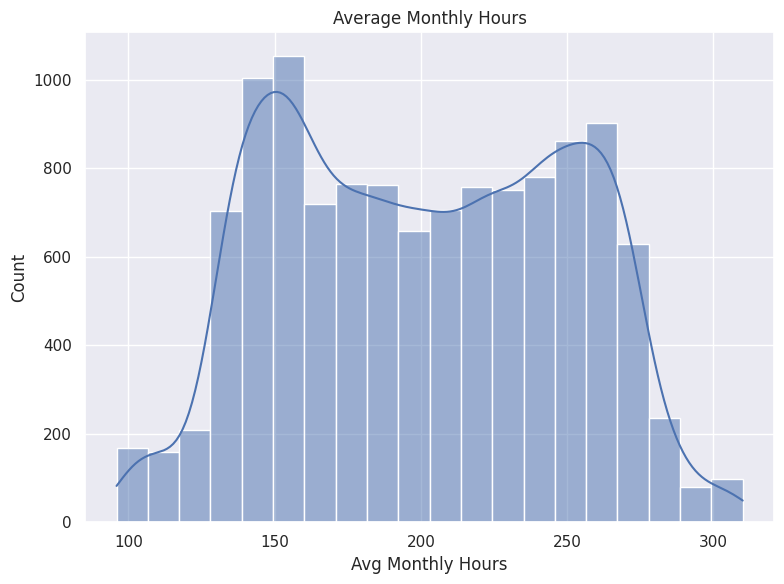

In [38]:
# Note we renamed average_montly_hours to average_monthly_hours
plt.figure(figsize=(8,6))
sns.set_theme()
sns.histplot(df['average_monthly_hours'], bins=20, kde=True)
plt.title("Average Monthly Hours")
plt.xlabel('Avg Monthly Hours')
plt.tight_layout()
plt.show()

# 2.3.Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

In [39]:
df_barplot = df.groupby(['number_project', 'left']).size().reset_index(name='count')
df_barplot.head()

,number_project,left,count
0,2,0,725
1,2,1,857
2,3,0,3482
3,3,1,38
4,4,0,3448


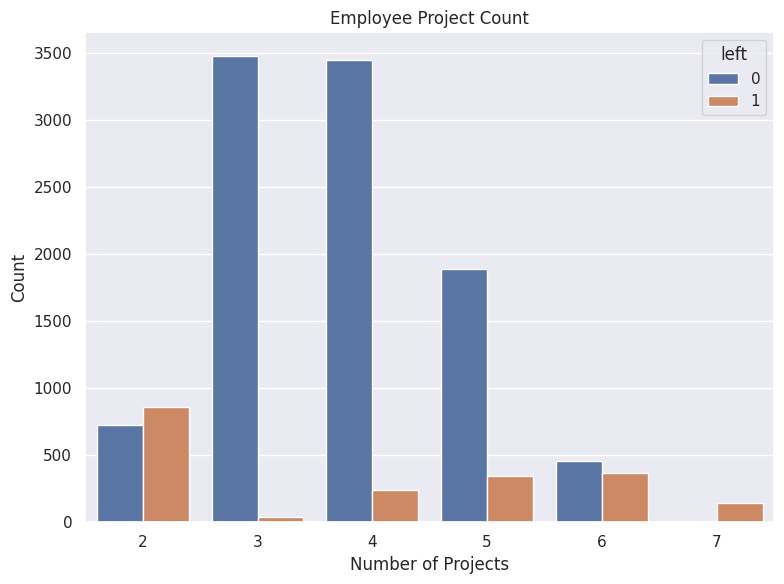

In [40]:
plt.figure(figsize=(8,6))
sns.set_theme()
sns.barplot(data=df_barplot, x='number_project', y='count', hue='left')
plt.title('Employee Project Count')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Employees with 3,4,5 projects are the one's hardly leave the company.
# Employees with 7 projects have left the company and none of them have stayed in the company.

# Perform clustering of employees who left based on their satisfaction and evaluation.
### 3.1.Choose columns satisfaction_level, last_evaluation, and left.


In [41]:
cols = ['satisfaction_level','last_evaluation','left']
df_cluster = df[cols]
df_cluster = df_cluster[df_cluster['left'] == 1]
df_cluster.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [42]:
df_cluster.columns

Index(['satisfaction_level', 'last_evaluation', 'left'], dtype='object')

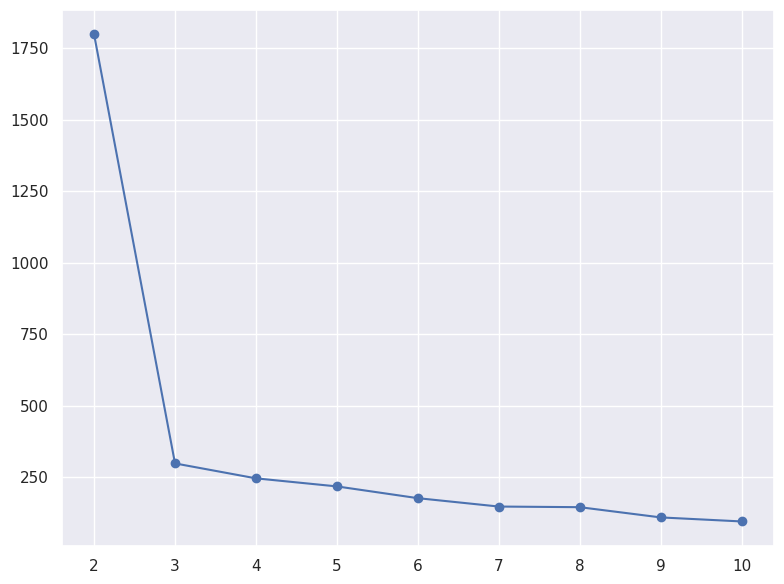

In [43]:
# Applying elbow method
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(df_cluster)

wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(2,11), wcss, marker='o')
plt.tight_layout()
plt.show()

# Elbow method shows that ideal cluster size is 3.

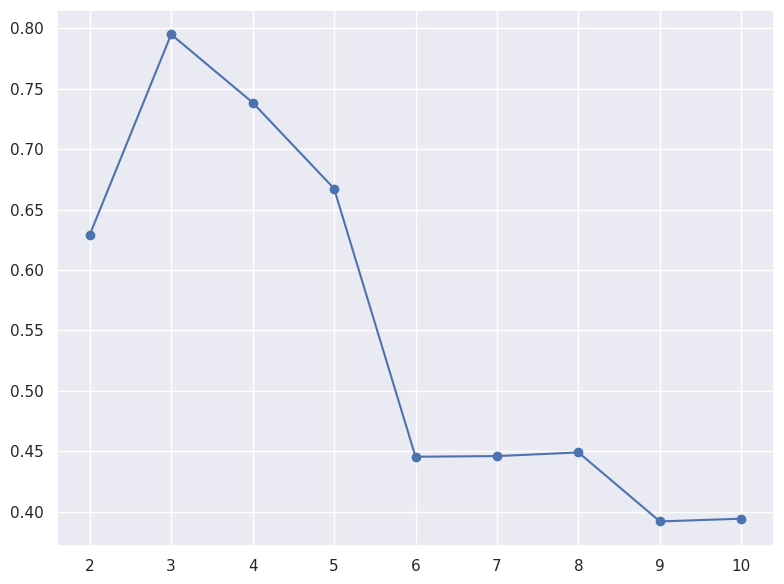

In [44]:
# Applying silhoutte method
from sklearn.metrics import silhouette_score

score = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_cluster)
  labels = kmeans.labels_
  score.append(silhouette_score(df_cluster, labels))

plt.figure(figsize=(8,6))
plt.plot(range(2,11), score, marker='o')
plt.tight_layout()
plt.show()

# This method is also suggesting cluster size as 3.

### 3.2. Do K-means clustering of employees who left the company into 3 clusters


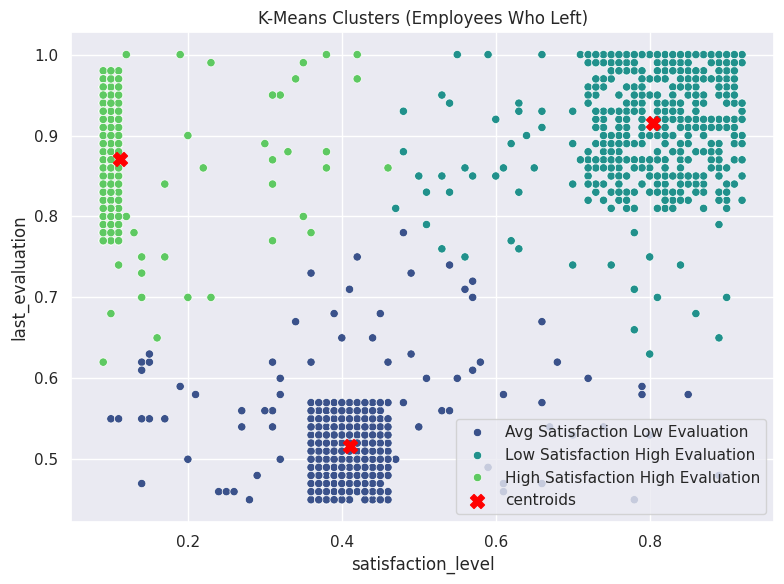

In [45]:
# Select only the columns used for clustering
X = df_cluster[['satisfaction_level', 'last_evaluation']]

# Scale the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df_cluster['cluster'] = kmeans.labels_

cluster_names = {
    0: 'Avg Satisfaction Low Evaluation',
    1: 'Low Satisfaction High Evaluation',
    2: 'High Satisfaction High Evaluation'
}

df_cluster['Cluster_Class'] = df_cluster['cluster'].map(cluster_names)

centroids = sc.inverse_transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cluster,
    x='satisfaction_level',
    y='last_evaluation',
    hue='Cluster_Class',
    palette='viridis'
)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    marker='X',
    color='red',
    label='centroids',
    s=100
)

plt.legend(loc='best')
plt.title('K-Means Clusters (Employees Who Left)')
plt.tight_layout()
plt.show()

### 3.3.Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

#### There are 3 clusters for employees who left the company:
#### 1. Employees with average satisfaction( around 0.4 ) and low_satisfaction
#### 2. Employees with Low satisfaction but high evaluation
#### 3. Employees with high satisfaction and high evaluation.

# Handle the left ClassImbalance using the SMOTE technique.
### 4.1.Pre-process  the  data  by  converting  categorical  columns  to  numerical columns by:
#### ■Separating categorical variables and numeric variables
#### ■Applying get_dummies() to the categorical variables
#### ■Combining categorical variables and numeric variables


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [47]:
df.left.value_counts()

,count
left,
0,10000
1,1991


In [48]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [49]:
df_cat_encoded = pd.get_dummies(df[cat_cols], drop_first=True).astype('int')
df_cat_encoded.head()

,department_hr,department_it,department_management,department_marketing,department_product_mng,department_r&d,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [50]:
df_final = pd.concat([df[num_cols], df_cat_encoded], axis=1)
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_hr,department_it,department_management,department_marketing,department_product_mng,department_r&d,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### 4.2. Do  the  stratified  split  of  the  dataset  to  train and  test  in  the  ratio  80:20 with random_state=123.

In [51]:
from sklearn.model_selection import train_test_split

X = df_final.drop('left',axis=1)
y = df_final['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(X_train.columns)
print(y_train)

(9592, 18)
(9592,)
(2399, 18)
(2399,)
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department_hr', 'department_it',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_r&d', 'department_sales',
       'department_support', 'department_technical', 'salary_low',
       'salary_medium'],
      dtype='object')
9492     0
11555    0
11301    0
5578     0
6241     0
        ..
10564    0
9614     0
3685     0
11042    0
7883     0
Name: left, Length: 9592, dtype: int64


### 4.3. Upsample  the  train  dataset  using the SMOTE  technique  from  the imblearn module

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Before applying SMOTE
print("Before applying SMOTE")
print(f"X_train Shape: {X_train_scaled.shape}")
print(f"Y_train Shape: {y_train.value_counts()}")
print("*"*80)
print("\nAfter applying SMOTE")

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

print(f"\nX_train Shape: {X_train_resampled.shape}")
print(f"Y_train Shape: {y_train_resampled.value_counts()}")

Before applying SMOTE
X_train Shape: (9592, 18)
Y_train Shape: left
0    7999
1    1593
Name: count, dtype: int64
********************************************************************************

After applying SMOTE

X_train Shape: (15998, 18)
Y_train Shape: left
0    7999
1    7999
Name: count, dtype: int64


# Perform 5-fold cross-validation model training and evaluate performance.
### 5.1.Train  a logistic regression  model, apply  a  5-fold  CV,and  plot  the classification report.


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

X = X_train_resampled
y = y_train_resampled

lr = LogisticRegression(random_state=42)

scores = cross_val_score(lr, X, y, cv=5)
y_pred = cross_val_predict(lr, X, y, cv=5)

print(f"Scores: {scores}")
print(f"Mean Scores: {scores.mean()}")
print("*"*80)
print("\n======CLASSIFICATION REPORT======")
print(classification_report(y, y_pred))

Scores: [0.7978125  0.798125   0.82875    0.80556424 0.79931229]
Mean Scores: 0.8059128047827446
********************************************************************************

======CLASSIFICATION REPORT======
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      7999
           1       0.78      0.85      0.81      7999

    accuracy                           0.81     15998
   macro avg       0.81      0.81      0.81     15998
weighted avg       0.81      0.81      0.81     15998



   precision    recall  f1-score
0   0.832473  0.765971  0.797838
1   0.783283  0.845856  0.813368


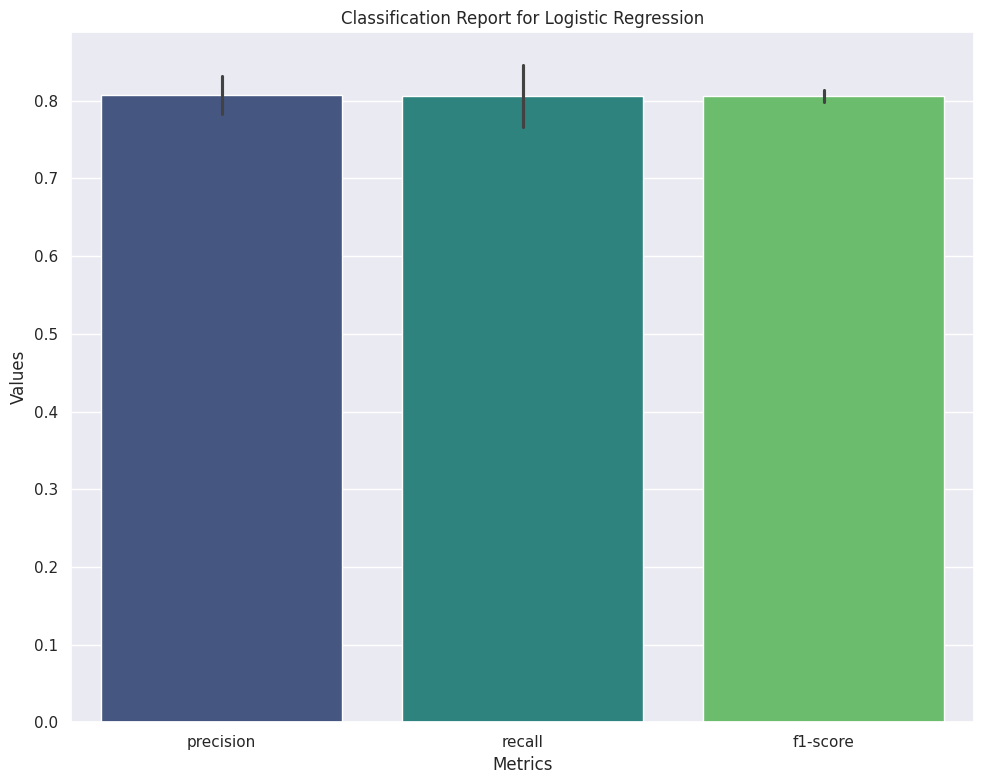

In [54]:
report = classification_report(y, y_pred, output_dict=True)
report_plot = pd.DataFrame(report).transpose().iloc[:-3,:-1]
print(report_plot)
plt.figure(figsize=(10,8))
sns.barplot(data=report_plot, palette='viridis')
plt.title('Classification Report for Logistic Regression')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

### 5.2. Train a Random Forest Classifier model,apply the 5-fold CV,and plot the classification report.

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report

X = X_train_resampled
y = y_train_resampled

rf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf, X, y, cv=5)
y_pred = cross_val_predict(rf, X, y, cv=5)

print(f"Scores: {scores}")
print(f"Mean Scores: {scores.mean()}")
print("*"*80)
print("\n======CLASSIFICATION REPORT======")
print(classification_report(y, y_pred))

Scores: [0.9609375  0.99125    0.9909375  0.98905908 0.99030947]
Mean Scores: 0.9844987105345421
********************************************************************************

======CLASSIFICATION REPORT======
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7999
           1       1.00      0.97      0.98      7999

    accuracy                           0.98     15998
   macro avg       0.98      0.98      0.98     15998
weighted avg       0.98      0.98      0.98     15998



   precision    recall  f1-score
0   0.973720  0.995874  0.984672
1   0.995778  0.973122  0.984320


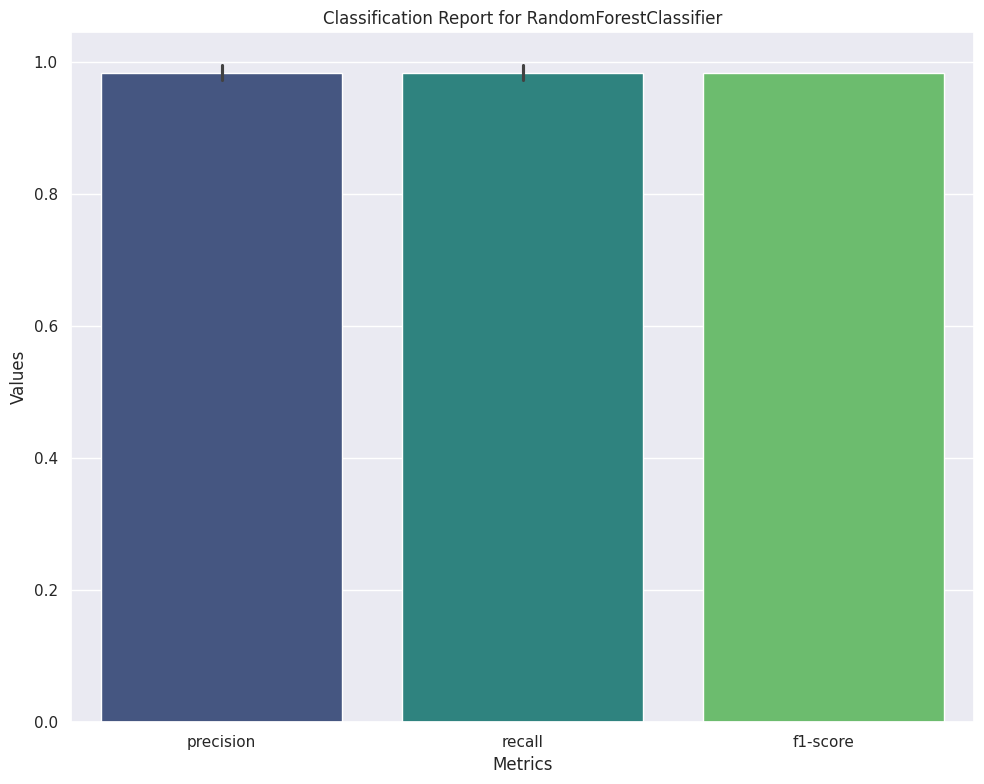

In [56]:
report = classification_report(y, y_pred, output_dict=True)
report_plot = pd.DataFrame(report).transpose().iloc[:-3,:-1]
print(report_plot)
plt.figure(figsize=(10,8))
sns.barplot(data=report_plot, palette='viridis')
plt.title('Classification Report for RandomForestClassifier')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

### 5.3. Train  a  Gradient  Boosting  Classifier  model,apply  the  5-fold  CV,and plot the classification report.

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report

X = X_train_resampled
y = y_train_resampled

gbc = GradientBoostingClassifier(random_state=42)

scores = cross_val_score(gbc, X, y, cv=5)
y_pred = cross_val_predict(gbc, X, y, cv=5)

print(f"Scores: {scores}")
print(f"Mean Scores: {scores.mean()}")
print("*"*80)
print("\n======CLASSIFICATION REPORT======")
print(classification_report(y, y_pred))

Scores: [0.95625    0.978125   0.9746875  0.98093154 0.98437012]
Mean Scores: 0.974872831353548
********************************************************************************

======CLASSIFICATION REPORT======
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7999
           1       0.98      0.97      0.97      7999

    accuracy                           0.97     15998
   macro avg       0.98      0.97      0.97     15998
weighted avg       0.98      0.97      0.97     15998



   precision    recall  f1-score
0   0.967048  0.983248  0.975081
1   0.982962  0.966496  0.974660


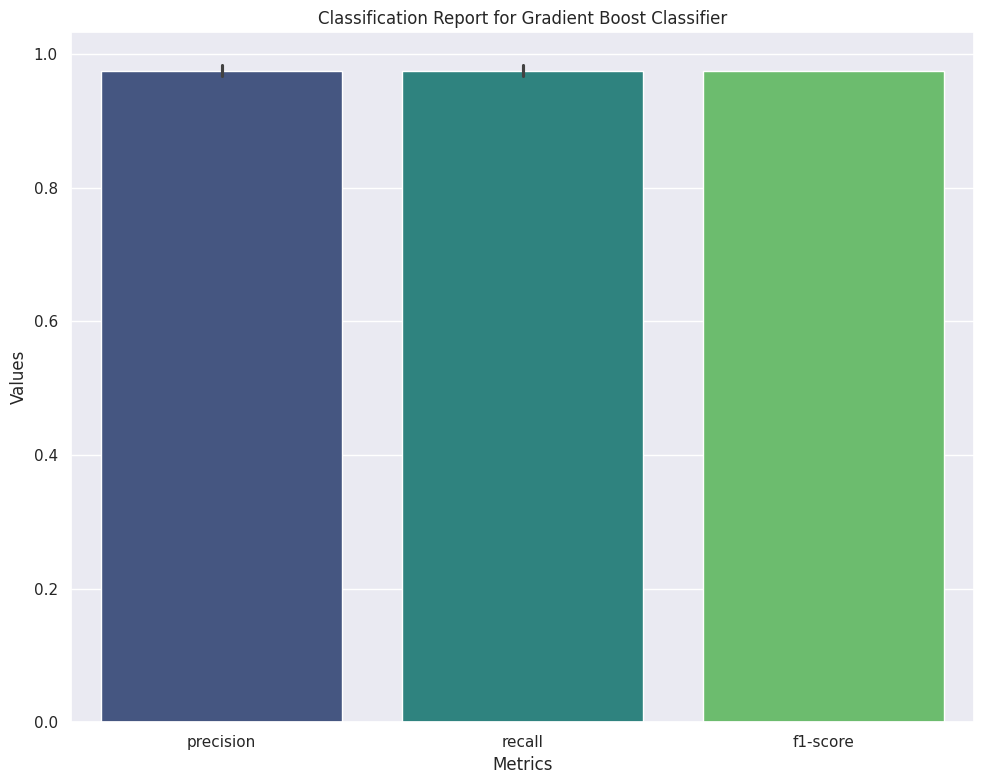

In [58]:
report = classification_report(y, y_pred, output_dict=True)
report_plot = pd.DataFrame(report).transpose().iloc[:-3,:-1]
print(report_plot)
plt.figure(figsize=(10,8))
sns.barplot(data=report_plot, palette='viridis')
plt.title('Classification Report for Gradient Boost Classifier')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

# Identify the best model and justify the evaluation metrics used.
### 6.1. Find the ROC/AUC for each model and plot the ROC curve.


In [59]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_hr,department_it,department_management,department_marketing,department_product_mng,department_r&d,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, roc_curve, confusion_matrix

sc = StandardScaler()

lr = LogisticRegression(random_state=42)
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

X = df_final.drop('left', axis=1)
y = df_final['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

sm = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

X_train_scaled = sc.fit_transform(X_train_resampled)
X_test_scaled = sc.transform(X_test)

lr.fit(X_train_scaled, y_train_resampled)
rfc.fit(X_train_scaled, y_train_resampled)
gbc.fit(X_train_scaled, y_train_resampled)

y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

print(f"Logisitic Regression training accuracy : {accuracy_score(y_pred_train_lr, y_train_resampled)}")
print(f"Logisitic Regression testing accuracy : {accuracy_score(y_pred_test_lr, y_test)}")
print("*"*100)

y_pred_train_rfc = rfc.predict(X_train_scaled)
y_pred_test_rfc = rfc.predict(X_test_scaled)

print(f"Random Forest Classifier training accuracy : {accuracy_score(y_pred_train_rfc, y_train_resampled)}")
print(f"Random Forest Classifier testing accuracy : {accuracy_score(y_pred_test_rfc, y_test)}")
print("*"*100)

y_pred_train_gbc = gbc.predict(X_train_scaled)
y_pred_test_gbc = gbc.predict(X_test_scaled)

print(f"Gradient Boosting Classifier training accuracy : {accuracy_score(y_pred_train_gbc, y_train_resampled)}")
print(f"Gradient Boosting Classifier testing accuracy : {accuracy_score(y_pred_test_gbc, y_test)}")
print("*"*100)

y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test_scaled)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test_scaled)[:,1]

print(f"Logisitic Regression AUC: {roc_auc_score(y_test, y_pred_proba_lr)}")
print(f"Random Forest Classifier AUC: {roc_auc_score(y_test, y_pred_proba_rfc)}")
print(f"Gradient Boosting Classifier AUC: {roc_auc_score(y_test, y_pred_proba_gbc)}")

# The best performing model is Random Forest Classifier.

Logisitic Regression training accuracy : 0.8316664583072884
Logisitic Regression testing accuracy : 0.7674030846185911
****************************************************************************************************
Random Forest Classifier training accuracy : 0.9999374921865233
Random Forest Classifier testing accuracy : 0.972488536890371
****************************************************************************************************
Gradient Boosting Classifier training accuracy : 0.9609951243905488
Gradient Boosting Classifier testing accuracy : 0.9616506877865777
****************************************************************************************************
Logisitic Regression AUC: 0.7902719494524094
Random Forest Classifier AUC: 0.9738654542075695
Gradient Boosting Classifier AUC: 0.9765651094050963


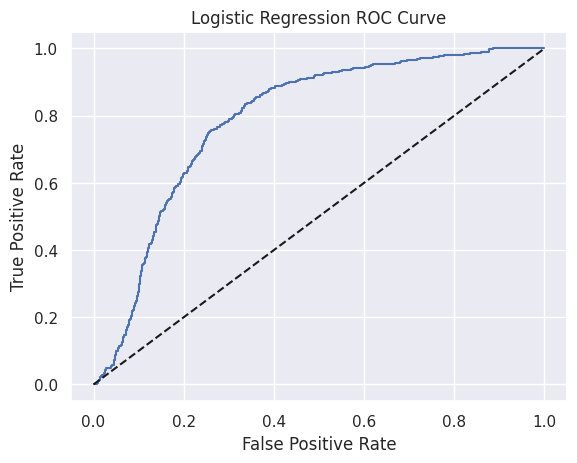

In [61]:
# Plot for LogisticRegression model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

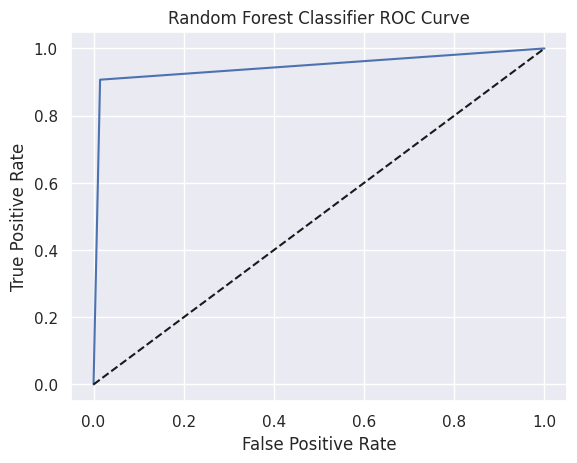

In [62]:
# Plot for RandomForestClassifier model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_rfc)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.show()

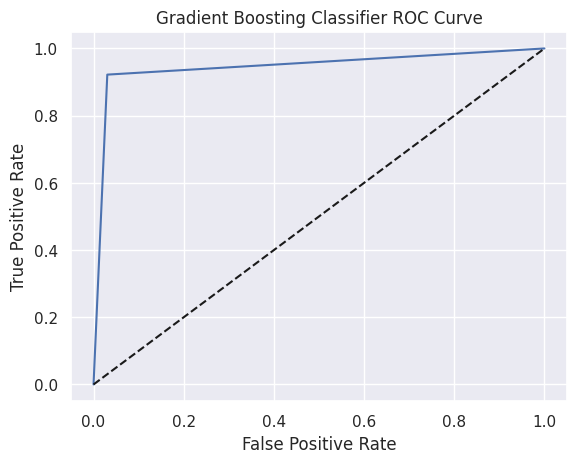

In [63]:
# Plot for GradientBoosting Classifier model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_gbc)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.show()

### 6.2. Find the confusion matrix for each of the models.

[[1590  411]
 [ 147  251]]


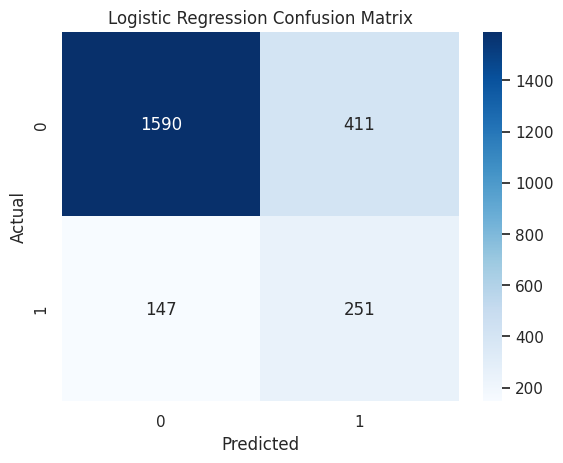

In [64]:
# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_test_lr)
print(cm)
sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[[1972   29]
 [  37  361]]


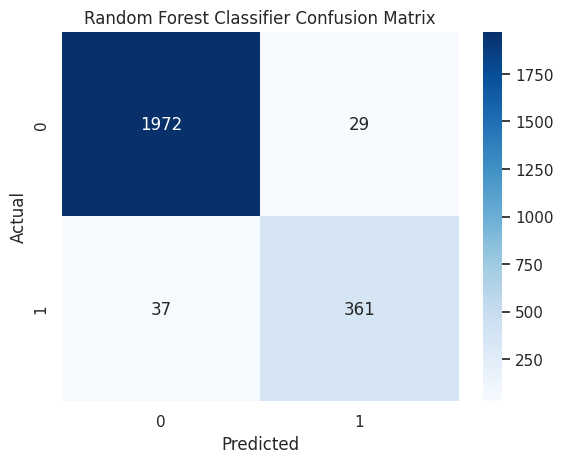

In [65]:
# Confusion Matrix for Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_test_rfc)
print(cm)
sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[[1940   61]
 [  31  367]]


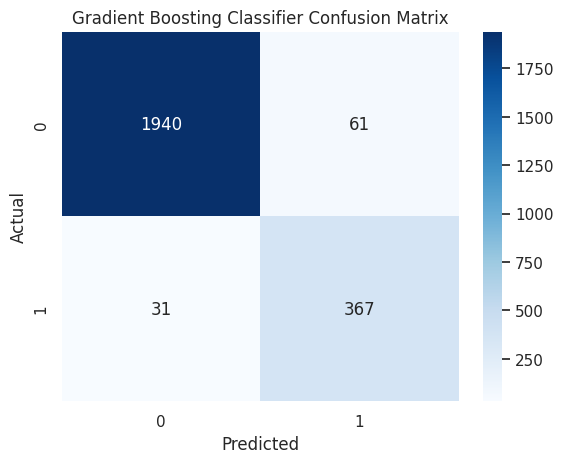

In [66]:
# Confusion Matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test, y_pred_test_gbc)
print(cm)
sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 6.3. Explain  which  metric  needs  to  be  used from  the  confusion  matrix: Recall or Precision?

# Precision --> TP/(TP+FP) --> when we want to have fewer false positives.
# Recall --> TP/(TP+FN) --> when we want to have fewer false negatives.

# In this case, we should use precision as the use case is of employee turnover. That is we want fewer false positives because we want the correct number of employees who have left the organization

# Suggest various retention strategies for targeted employees.

### 7.1. Using  the  best  model,  predict  the  probability  of  employee  turnover  in the test data.



In [107]:
# Using random forest classifer as the best model

y_pred_test_proba = rfc.predict_proba(X_test_scaled)[:,1]
y_pred_test = rfc.predict(X_test_scaled)

print(y_pred_test_proba)
print(y_pred_test)
# print(X_test_scaled)

X_test_df = X_test.copy()
y_pred_test_proba_df = pd.DataFrame(y_pred_test_proba, columns=['probability'])
y_pred_test_df = pd.DataFrame(y_pred_test, columns=['isleft'])

X_test_df = X_test_df.reset_index(drop=True)
y_pred_test_proba_df = y_pred_test_proba_df.reset_index(drop=True)
y_pred_test_df = y_pred_test_df.reset_index(drop=True)

# Now concat X_test_df and y_pred_test_proba_df
df_test_final = pd.concat([X_test_df, y_pred_test_proba_df, y_pred_test_df], axis=1)
df_test_final.shape

[0.08 0.67 0.05 ... 0.   0.   0.14]
[0 1 0 ... 0 0 0]


(2399, 20)

In [108]:
df_test_final.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department_hr,department_it,department_management,department_marketing,department_product_mng,department_r&d,department_sales,department_support,department_technical,salary_low,salary_medium,probability,isleft
0,0.82,0.95,6,191,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0.08,0
1,0.18,0.86,5,267,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0.67,1
2,0.63,0.98,4,160,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0.05,0
3,0.43,0.51,2,149,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0.99,1
4,0.51,0.98,4,245,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0.01,0



### 7.2. Based on the probability score range below, categorize the employees into  four  zones  and  suggest  your  thoughts  on  the  retention  strategies for each zone.
#### ■Safe Zone (Green) (Score < 20%)
#### ■Low-Risk Zone (Yellow) (20% < Score < 60%)
#### ■Medium-Risk Zone (Orange) (60% < Score < 90%)
#### ■High-Risk Zone (Red) (Score > 90%).

In [112]:
bins = [0, 0.2, 0.6, 0.9, 1.0]
labels = ['Safe Zone (Green)','Low-Risk Zone (Yellow)','Medium-Risk Zone (Orange)', 'High-Risk Zone (Red)']

df_test_final['risk_zone'] = pd.cut(df_test_final['probability'], bins = bins, labels = labels)
df_test_final.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department_hr,department_it,department_management,...,department_product_mng,department_r&d,department_sales,department_support,department_technical,salary_low,salary_medium,probability,isleft,risk_zone
0,0.82,0.95,6,191,6,0,0,0,0,0,...,0,0,0,0,0,0,1,0.08,0,Safe Zone (Green)
1,0.18,0.86,5,267,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0.67,1,Medium-Risk Zone (Orange)
2,0.63,0.98,4,160,2,0,0,0,0,0,...,0,0,1,0,0,0,1,0.05,0,Safe Zone (Green)
3,0.43,0.51,2,149,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0.99,1,High-Risk Zone (Red)
4,0.51,0.98,4,245,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0.01,0,Safe Zone (Green)


In [114]:
df_test_final.risk_zone.value_counts(normalize=True) * 100

# As we can see that approx. 70% employees are in the Safe Zone so no action is required for now to retain them.
# As we can see that 9.2% employees are in Low-Risk Zone so we can conduct employee surveys, ensure that average monthly hours are within limits. Provide learning opportunities as well.
# As we can see that 2.8% employees are in Medium-Risk Zone so we can conduct one-on-one with managers. Provide feedback and plan out immediate role elevation strategies or bonuses.

# As we can see that 18% employees are in High-Risk Zone so organization should take immediate action and see for probable reasons for this.
# Employees should be given proper career path and planning for future opportunities within the organization.

,proportion
risk_zone,
Safe Zone (Green),69.801980
High-Risk Zone (Red),18.096810
Low-Risk Zone (Yellow),9.295930
Medium-Risk Zone (Orange),2.805281
